In [1]:
from sklearn.manifold import TSNE
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from my_knn_module.import_data import import_genome_data_as_df
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
real_df = import_genome_data_as_df()

In [3]:
X = real_df.iloc[:, 3:10002]
y = np.ravel(real_df.iloc[:, 10002:10003])

X = X.to_numpy()

In [4]:
tsme = TSNE(n_components=2).fit_transform(X)

/home/ghost/.local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/ghost/.local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [6]:
print(tsme)
X = tsme

[[ 14.990551    5.7129974]
 [ -5.704702   49.36799  ]
 [ 29.728472   13.164331 ]
 ...
 [ 30.355946   20.333988 ]
 [-18.494886    4.070273 ]
 [-56.424545    1.1825411]]


In [7]:
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from math import sqrt

In [8]:
NUMBER_OF_NEIGHBORS = 6
MODEL = KNeighborsClassifier

In [9]:
knn_model = MODEL(n_neighbors = NUMBER_OF_NEIGHBORS)
knn_model.fit(X, y)

KNeighborsClassifier(n_neighbors=6)

In [10]:
train_preds = knn_model.predict(X)
mse = mean_squared_error(y, train_preds)
rmse = sqrt(mse)
print("The mean squared error for our model is: ", rmse)

The mean squared error for our model is:  0.9642159820620574


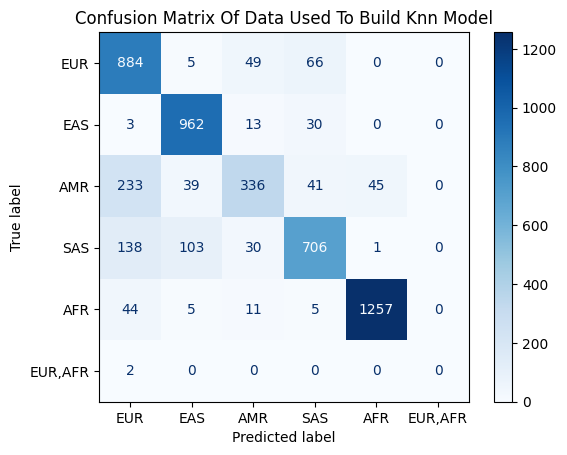

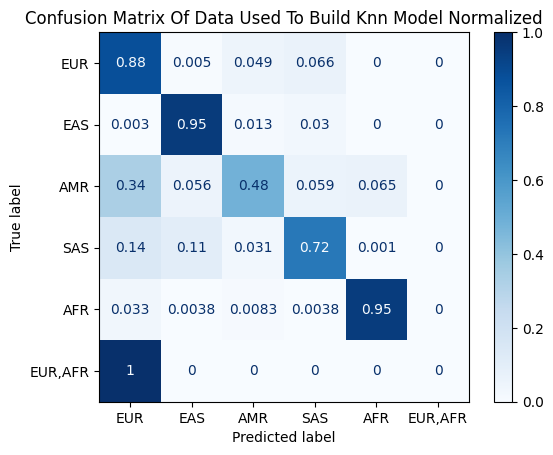

In [11]:
disp = ConfusionMatrixDisplay.from_estimator(
    knn_model,
    X,
    y,
    cmap=plt.cm.Blues,
    display_labels=["EUR", "EAS", "AMR", "SAS", "AFR", "EUR,AFR"],
    normalize=None
)

disp.ax_.set_title("Confusion Matrix Of Data Used To Build Knn Model")

plt.show()

disp = ConfusionMatrixDisplay.from_estimator(
    knn_model,
    X,
    y,
    cmap=plt.cm.Blues,
    display_labels=["EUR", "EAS", "AMR", "SAS", "AFR", "EUR,AFR"],
    normalize='true'
)

disp.ax_.set_title("Confusion Matrix Of Data Used To Build Knn Model Normalized")

plt.show()

In [12]:
print(knn_model.score(X, y))

0.8276757188498403
